# Data Money Company 

**Data Money** is a data science consulting firm that prides itself on delivering high financial returns to its clients. We achieve this through the development and implementation of high-performing machine learning algorithms. As a newly hired Data Scientist at Data Money, I've been tasked with conducting a series of trials using various machine learning algorithms. The goal is to gain hands-on experience with these models, evaluate their performance across different scenarios, and document my findings to share with the team.

**Business Question**: “Is it possible to predict overall customer satisfaction based on their demographics, flight preferences, and service ratings?”

This first notebook focuses on **Classification** algorithms. The goal is to **predict whether a customer will be satisfied with their flight experience based on their demographics, travel preferences, and in-flight service ratings**.

## Algorithms and Metrics

This project will explore and compare the performance of four popular classification algorithms:

**1. K-Nearest Neighbors (KNN)**

* **How it works:** Imagine plotting each customer's data point on a graph based on their characteristics.  KNN predicts a new customer's satisfaction by looking at the satisfaction of their "nearest neighbors" – the 'k' data points closest to them on the graph. If most neighbors are satisfied, the new customer is likely to be satisfied as well. 
* **Strengths:** Simple to understand and implement. Effective when the relationship between features and satisfaction is complex or non-linear.
* **Weaknesses:**  Can be computationally expensive for large datasets. Sensitive to the choice of 'k' (the number of neighbors).

**2. Decision Tree**

* **How it works:**  This algorithm creates a tree-like structure where each node represents a decision based on a specific feature (e.g., "Is the flight distance greater than 500 miles?").  The tree branches out until it reaches a leaf node, which predicts the customer's satisfaction. 
* **Strengths:** Easy to interpret and visualize. Handles both categorical and numerical data well. 
* **Weaknesses:** Prone to overfitting, especially with complex datasets. Small changes in data can lead to large changes in the tree structure.

**3. Random Forest**

* **How it works:** An ensemble method that combines multiple decision trees. Each tree is trained on a random subset of the data and features.  The forest then predicts satisfaction by aggregating the predictions of all the individual trees.
* **Strengths:**  More robust and accurate than a single decision tree.  Reduces overfitting. 
* **Weaknesses:** Can be computationally expensive to train.  Less interpretable than a single decision tree. 

**4. Logistic Regression**

* **How it works:**  Despite its name, it's a classification algorithm. It calculates the probability of a customer being satisfied based on a weighted combination of their features. If the probability is above a certain threshold, the customer is classified as "satisfied." 
* **Strengths:** Efficient and works well with large datasets.  Provides a probability estimate for each prediction. 
* **Weaknesses:**  Assumes a linear relationship between features and satisfaction. May not perform well with highly complex datasets.

**Evaluating Performance**

To compare these algorithms, we'll use the following metrics:

* **Accuracy:** The percentage of correctly classified customers (satisfied or not). 
* **Precision:**  Out of all customers predicted as satisfied, how many were actually satisfied?
* **Recall:** Out of all the actual satisfied customers, how many did the model correctly identify?
* **F1-Score:** The harmonic mean of precision and recall, providing a balanced measure of the model's performance.



# 0 - Imports

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=UserWarning, module='numpy')

/home/daniel/.pyenv/versions/3.12.4/envs/projeto_aluno/lib/python3.12/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


# 1 - Loading data

In [3]:
X_train = pd.read_csv('Data/Classification/X_training.csv')
y_train = pd.read_csv('Data/Classification/y_training.csv')

X_val   = pd.read_csv('Data/Classification/X_validation.csv')
y_val   = pd.read_csv('Data/Classification/y_validation.csv')

X_test  = pd.read_csv('Data/Classification/X_test.csv')
y_test  = pd.read_csv('Data/Classification/y_test.csv')

# 2 - EDA

In [3]:
y_train['0'].unique()

array([1, 0])

In [4]:
y_train.value_counts(normalize=True)

0
0    0.5666
1    0.4334
Name: proportion, dtype: float64

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72515 entries, 0 to 72514
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 72515 non-null  int64  
 1   customer_type                      72515 non-null  int64  
 2   age                                72515 non-null  float64
 3   class                              72515 non-null  float64
 4   flight_distance                    72515 non-null  float64
 5   inflight_wifi_service              72515 non-null  float64
 6   departure_arrival_time_convenient  72515 non-null  float64
 7   ease_of_online_booking             72515 non-null  float64
 8   gate_location                      72515 non-null  float64
 9   food_and_drink                     72515 non-null  float64
 10  online_boarding                    72515 non-null  float64
 11  seat_comfort                       72515 non-null  flo

#### This dataset does not contain null values

In [6]:
X_train.describe()

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
count,72515.000000,72515.000000,72515.000000,72515.000000,72515.000000,72515.000000,72515.000000,72515.000000,72515.000000,72515.000000,...,72515.000000,72515.000000,72515.000000,72515.000000,72515.000000,72515.000000,72515.000000,72515.000000,72515.000000,72515.000000
mean,64786.264414,0.817141,0.415721,0.514176,0.234290,0.546646,0.611898,0.551673,0.595620,0.640496,...,0.657447,0.575395,0.727918,0.657991,0.014429,0.014973,0.506943,0.493057,0.690078,0.309922
std,37484.446983,0.386553,0.193586,0.481459,0.201790,0.265402,0.304934,0.279502,0.255791,0.266112,...,0.295952,0.316940,0.235470,0.262654,0.037280,0.038022,0.499955,0.499955,0.462464,0.462464
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32337.500000,1.000000,0.256410,0.000000,0.077342,0.400000,0.400000,0.400000,0.400000,0.400000,...,0.500000,0.500000,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64688.000000,1.000000,0.423077,0.500000,0.163772,0.600000,0.600000,0.600000,0.600000,0.600000,...,0.750000,0.500000,0.800000,0.600000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,97230.000000,1.000000,0.564103,1.000000,0.345921,0.800000,0.800000,0.800000,0.800000,0.800000,...,1.000000,0.750000,1.000000,0.800000,0.011799,0.012859,1.000000,1.000000,1.000000,1.000000
max,129880.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### This dataset is already normalized

In [7]:
X_val.head()

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,75635,1,0.525641,1.0,0.714055,1.0,1.0,1.0,1.0,0.8,...,0.75,0.75,0.8,0.8,0.000000,0.000000,0.0,1.0,1.0,0.0
1,106136,1,0.615385,1.0,0.054725,0.4,1.0,1.0,1.0,0.4,...,0.25,0.00,0.4,0.6,0.004916,0.004946,0.0,1.0,1.0,0.0
2,94469,1,0.435897,1.0,0.342690,0.0,0.2,0.2,0.6,0.8,...,0.25,0.75,0.4,0.6,0.004916,0.000000,1.0,0.0,1.0,0.0
3,42104,1,0.615385,1.0,0.649838,1.0,1.0,0.6,1.0,1.0,...,0.75,0.75,0.8,0.8,0.000000,0.000989,1.0,0.0,1.0,0.0
4,78762,1,0.282051,0.0,0.100363,0.4,0.6,0.6,0.6,0.4,...,0.75,0.75,0.6,0.4,0.093412,0.090010,0.0,1.0,1.0,0.0


#### Removing "id" column from the X's datasets

In [4]:
X_train_subset = X_train.iloc[:, 1:]
X_val_subset   = X_val.iloc[:, 1:]
X_test_subset  = X_test.iloc[:,1:]

In [5]:
X_train_val = np.concatenate((X_train_subset, X_val_subset))
y_train_val = np.concatenate((y_train.values.ravel(), y_val.values.ravel()))

# 3 - Model Training

## 3.1 - KNN

### 3.1.1 - Training

Testing combinations of n_neighbors:
n_neighbors=3
n_neighbors=5
n_neighbors=7
n_neighbors=9
n_neighbors=11


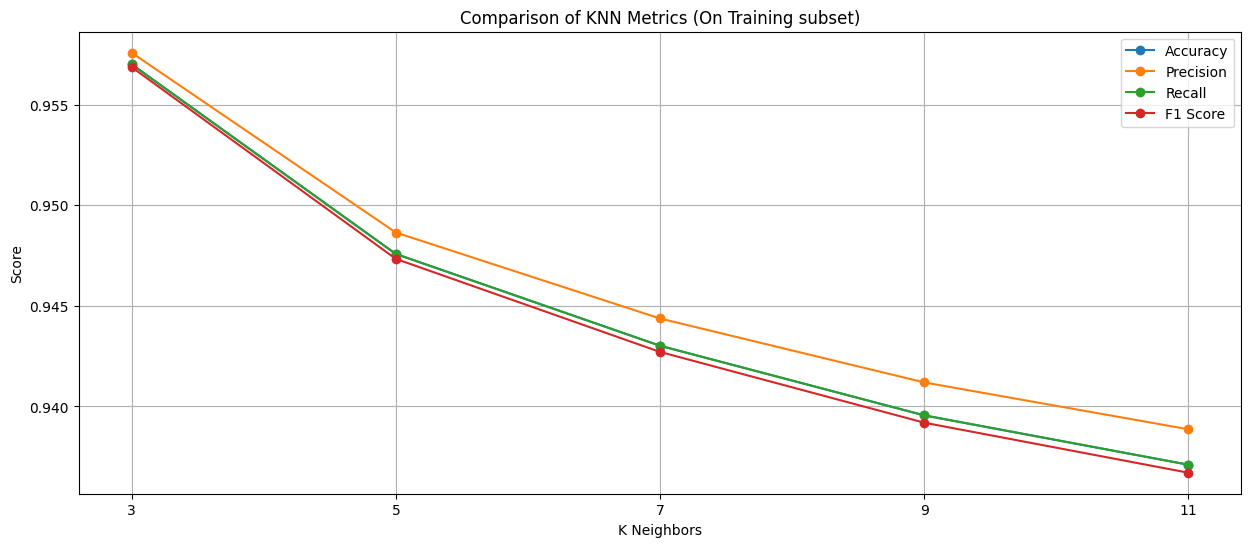

Best n_neighbors: 3

Accuracy Over Training:  0.957
Precision Over Training: 0.958
Recall Over Training:    0.957
F1 Score Over Training:  0.957


In [6]:
n_neighbors_max = 15
n_neighbors_range = list(range(3, n_neighbors_max + 1, 2))

knn_metrics_dict_train = {}

consecutive_decreases = 0
prev_accuracy = 0

print('Testing combinations of n_neighbors:')
for i in n_neighbors_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train_subset, y_train.values.ravel())

    yhat = knn_classifier.predict(X_train_subset)

    # Metrics calculation
    metrics = {
        'accuracy': accuracy_score(y_train, yhat),
        'precision': precision_score(y_train, yhat, average='weighted'),
        'recall': recall_score(y_train, yhat, average='weighted'),
        'f1': f1_score(y_train, yhat, average='weighted')
    }

    # Store metrics
    knn_metrics_dict_train[i] = metrics

    print(f'n_neighbors={i}')

    # Check if accuracy has decreased
    if metrics['accuracy'] < prev_accuracy:
        consecutive_decreases += 1
    else:
        consecutive_decreases = 0

    prev_accuracy = metrics['accuracy']

    # Stop if there are 5 consecutive decreases
    if consecutive_decreases >= 4:
        break

# Plotting the metrics
valid_neighbors = list(knn_metrics_dict_train.keys())
accuracy_values = [knn_metrics_dict_train[n]['accuracy'] for n in valid_neighbors]
precision_values = [knn_metrics_dict_train[n]['precision'] for n in valid_neighbors]
recall_values = [knn_metrics_dict_train[n]['recall'] for n in valid_neighbors]
f1_values = [knn_metrics_dict_train[n]['f1'] for n in valid_neighbors]

plt.figure(figsize=(15, 6))
plt.plot(valid_neighbors, accuracy_values, '-o', label='Accuracy')
plt.plot(valid_neighbors, precision_values, '-o', label='Precision')
plt.plot(valid_neighbors, recall_values, '-o', label='Recall')
plt.plot(valid_neighbors, f1_values, '-o', label='F1 Score')

plt.xlabel('K Neighbors')
plt.ylabel('Score')
plt.title(f'Comparison of KNN Metrics (On Training subset)')
plt.xticks(valid_neighbors)
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Find the best n_neighbors based on accuracy
best_k_train = max(knn_metrics_dict_train, key=lambda k: knn_metrics_dict_train[k]['accuracy'])

# Accessing the metrics of the best n_neighbors
knn_metrics_best_train = knn_metrics_dict_train[best_k_train]

# Displaying the best combination and its metrics
print(f'Best n_neighbors: {best_k_train}\n')
print(f'Accuracy Over Training:  {knn_metrics_best_train["accuracy"]:.3f}')
print(f'Precision Over Training: {knn_metrics_best_train["precision"]:.3f}')
print(f'Recall Over Training:    {knn_metrics_best_train["recall"]:.3f}')
print(f'F1 Score Over Training:  {knn_metrics_best_train["f1"]:.3f}')

### 3.1.2 - Validation

Testing different values of k:
k=3 k=5 k=7 k=9 k=11 k=13 k=15 

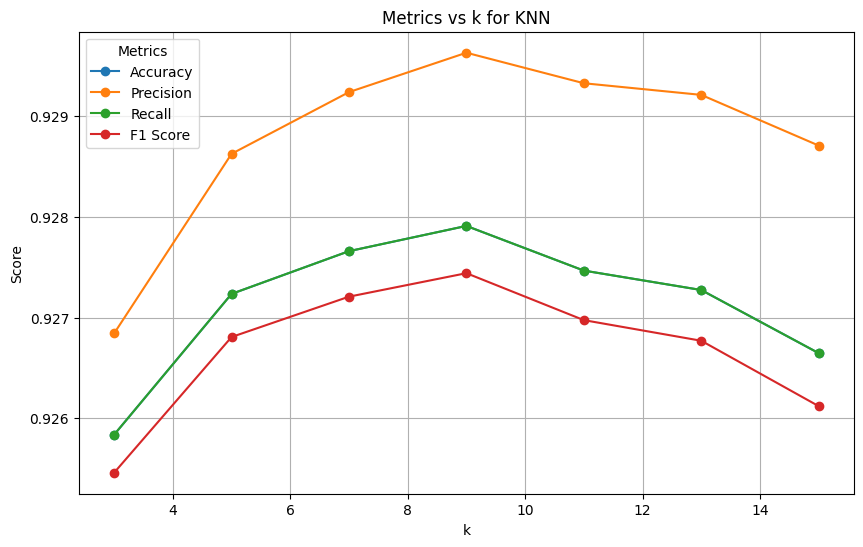

Best K: 9


{'accuracy': np.float64(0.9279108877815687),
 'precision': np.float64(0.9296324950918811),
 'recall': np.float64(0.9279108877815687),
 'f1': np.float64(0.927441091677365)}

In [21]:
# ensures that in each fold the selection is random, but the proportion of classes is maintained
cv = StratifiedKFold(
    n_splits=5,
    random_state=0,
    shuffle=True
)

# list of k values
k_values = range(3, 16, 2)
# DataFrame to append results
result_df_knn_val = {}

print('Testing different values of k:')
for k in k_values:
    # Instantiate the model
    clf_knn = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation
    cross_val_result = cross_validate(
        clf_knn,
        np.concatenate((X_train_subset, X_val_subset)),
        np.concatenate((y_train.values.ravel(), y_val.values.ravel())),
        cv=cv,
        scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
        return_train_score=False
    )

    # Store the mean metrics in the dictionary
    result_df_knn_val[k] = {
        'accuracy': cross_val_result['test_accuracy'].mean(),
        'precision': cross_val_result['test_precision_weighted'].mean(),
        'recall': cross_val_result['test_recall_weighted'].mean(),
        'f1': cross_val_result['test_f1_weighted'].mean()
    }

    print(f'k={k}', end=' ')

# Convert the dictionary to a list of dictionaries for plotting
result_list_knn_val = [{'k': k, **metrics} for k, metrics in result_df_knn_val.items()]

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.plot([item['k'] for item in result_list_knn_val], [item['accuracy'] for item in result_list_knn_val], label='Accuracy', marker='o')
plt.plot([item['k'] for item in result_list_knn_val], [item['precision'] for item in result_list_knn_val], label='Precision', marker='o')
plt.plot([item['k'] for item in result_list_knn_val], [item['recall'] for item in result_list_knn_val], label='Recall', marker='o')
plt.plot([item['k'] for item in result_list_knn_val], [item['f1'] for item in result_list_knn_val], label='F1 Score', marker='o')

# Plot settings
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Metrics vs k for KNN')
plt.legend(title='Metrics')
plt.grid(True)
plt.show()

# Find the best k value based on accuracy
best_k_val = max(result_df_knn_val, key=lambda k: result_df_knn_val[k]['accuracy'])

# Extract the metrics for the best k value
knn_metrics_best_val = result_df_knn_val[best_k_val]

print(f'Best K: {best_k_val}')
knn_metrics_best_val

### 3.1.3 - Test

In [22]:
# Model trained on training + validation

model_last = KNeighborsClassifier(n_neighbors=best_k_val)
model_last.fit(X_train_val, y_train_val)

#classification on test data
yhat_test = model_last.predict(X_test_subset)

report = classification_report(y_test, yhat_test, output_dict=True)
knn_metrics_test = {
    'accuracy': report['accuracy'],
    'precision': report['weighted avg']['precision'],
    'recall': report['weighted avg']['recall'],
    'f1': report['weighted avg']['f1-score']
}

knn_metrics_test

{'accuracy': 0.9293631483412506,
 'precision': 0.9309912482911938,
 'recall': 0.9293631483412506,
 'f1': 0.9289556570498464}

### 3.1.4 - Results

In [27]:
knn_metrics = pd.DataFrame({
    'Train': knn_metrics_best_train,
    'Validation': knn_metrics_best_val,
    'Test': knn_metrics_test
})
knn_metrics = knn_metrics.T
knn_metrics

,accuracy,precision,recall,f1
Train,0.957016,0.957590,0.957016,0.956874
Validation,0.927911,0.929632,0.927911,0.927441
Test,0.929363,0.930991,0.929363,0.928956


## 3.2 -  Decision Tree

### 3.2.1 - Training

In [41]:
# Definition
tree_classifier = DecisionTreeClassifier(random_state=0)

# Training
tree_classifier.fit(X_train_subset, y_train.values.ravel())

# Classification over training data
yhat_train = tree_classifier.predict(X_train_subset)

# Metrics calculation
report = classification_report(y_train.values.ravel(), yhat_train, output_dict=True)
dt_metrics_train = {
    'accuracy' : report['accuracy'],
    'precision': report['weighted avg']['precision'],
    'recall'   : report['weighted avg']['recall'],
    'f1'       : report['weighted avg']['f1-score']
}

dt_metrics_train

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

### 3.2.2 - Validation

max_depth tested:  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  

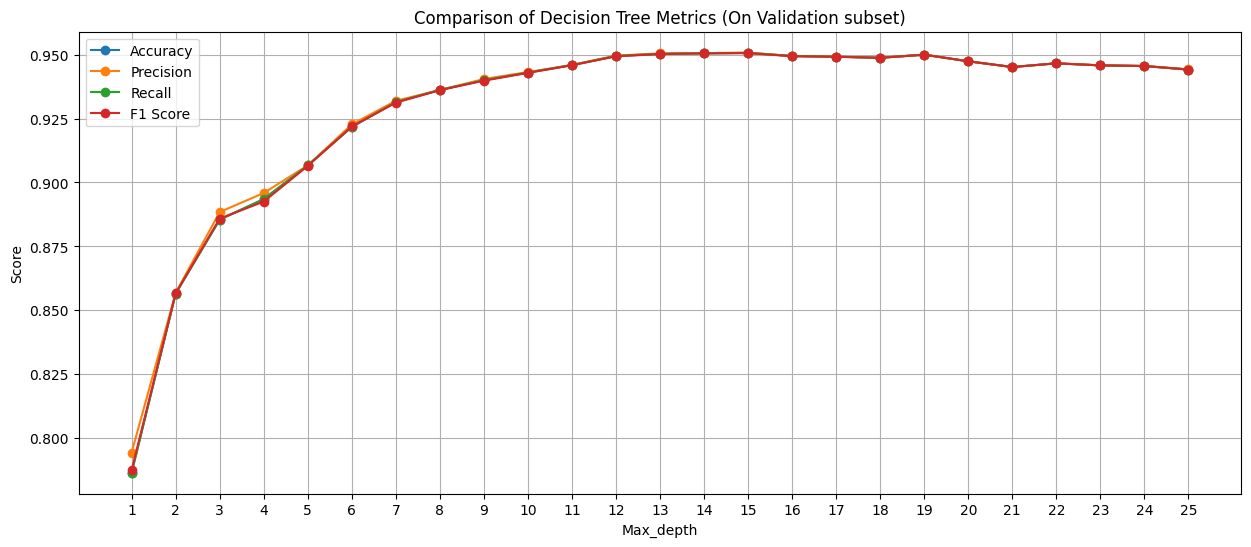

Best max_depth_tree: 15


{'accuracy': 0.9507384407477718,
 'precision': np.float64(0.9508660463456472),
 'recall': np.float64(0.9507384407477718),
 'f1': np.float64(0.9506450733316885)}

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# List of max_depth values to test
max_depth = [i for i in range(1, 26)]

# Dictionary to store metrics for each max_depth
tree_metrics_dict_val = {i: {'accuracy': None, 'precision': None, 'recall': None, 'f1': None} for i in max_depth}

print('max_depth tested:', end='  ')
for i in max_depth:
    # Instantiate and train the model
    tree_classifier = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree_classifier.fit(X_train_subset, y_train.values.ravel())

    # Predict on validation data
    yhat_val = tree_classifier.predict(X_val_subset)

    # Calculate metrics
    accuracy = accuracy_score(y_val, yhat_val)
    precision = precision_score(y_val, yhat_val, average='weighted')
    recall = recall_score(y_val, yhat_val, average='weighted')
    f1 = f1_score(y_val, yhat_val, average='weighted')
    
    # Store metrics in the dictionary
    tree_metrics_dict_val[i] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    print(f'{i}', end='  ')

# Find the best max_depth based on accuracy
best_max_depth_tree = max(tree_metrics_dict_val, key=lambda k: tree_metrics_dict_val[k]['accuracy'])

# Create a dictionary for the best metrics
dt_metrics_best_val = tree_metrics_dict_val[best_max_depth_tree]

# Plot the metrics
accuracy = [tree_metrics_dict_val[n]['accuracy'] for n in max_depth]
precision = [tree_metrics_dict_val[n]['precision'] for n in max_depth]
recall = [tree_metrics_dict_val[n]['recall'] for n in max_depth]
f1 = [tree_metrics_dict_val[n]['f1'] for n in max_depth]

plt.figure(figsize=(15, 6))
plt.plot(max_depth, accuracy, '-o', label='Accuracy')
plt.plot(max_depth, precision, '-o', label='Precision')
plt.plot(max_depth, recall, '-o', label='Recall')
plt.plot(max_depth, f1, '-o', label='F1 Score')

# Plot settings
plt.xlabel('Max_depth')
plt.ylabel('Score')
plt.title('Comparison of Decision Tree Metrics (On Validation subset)')
plt.xticks(max_depth) 
plt.legend(loc='best')
plt.grid(True)

plt.show()

print(f'Best max_depth_tree: {best_max_depth_tree}')
dt_metrics_best_val


### 3.2.3 - Test

In [44]:
# Model trained on training + validation

model_last = DecisionTreeClassifier(max_depth=best_max_depth_tree, random_state=0)
model_last.fit(X_train_val, y_train_val)

#classification on test data
yhat_test = model_last.predict(X_test_subset)

# Metrics calculation
report = classification_report(y_test, yhat_test, output_dict=True)
dt_metrics_test = {
    'accuracy': report['accuracy'],
    'precision': report['weighted avg']['precision'],
    'recall': report['weighted avg']['recall'],
    'f1': report['weighted avg']['f1-score']
}

dt_metrics_test

{'accuracy': 0.9553547290773569,
 'precision': 0.9554586304310896,
 'recall': 0.9553547290773569,
 'f1': 0.9552878570149588}

### 3.2.4 - Results

In [45]:
dt_metrics = pd.DataFrame({
    'Train': dt_metrics_train,
    'Validation': dt_metrics_best_val,
    'Test':dt_metrics_test
})
dt_metrics = dt_metrics.T
dt_metrics

,accuracy,precision,recall,f1
Train,1.000000,1.000000,1.000000,1.000000
Validation,0.950738,0.950866,0.950738,0.950645
Test,0.955355,0.955459,0.955355,0.955288


## 3.3 - Random Forest

### 3.3.1 - Training

In [46]:
# Definition
rf_classifier = RandomForestClassifier(random_state=0)

# Training
rf_classifier.fit(X_train_subset, y_train.values.ravel())

# Classification over training data
yhat_train = rf_classifier.predict(X_train_subset)

# Metrics calculation
report = classification_report(y_train.values.ravel(), yhat_train, output_dict=True)
rf_metrics_train = {
    'accuracy' : report['accuracy'],
    'precision': report['weighted avg']['precision'],
    'recall'   : report['weighted avg']['recall'],
    'f1'       : report['weighted avg']['f1-score']
}

rf_metrics_train

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

### 3.2.2 - Validation

For the validation tests, a reduced version of the dataset will be used to adjust the parameters so that they can be used in the next stage, in the final model.

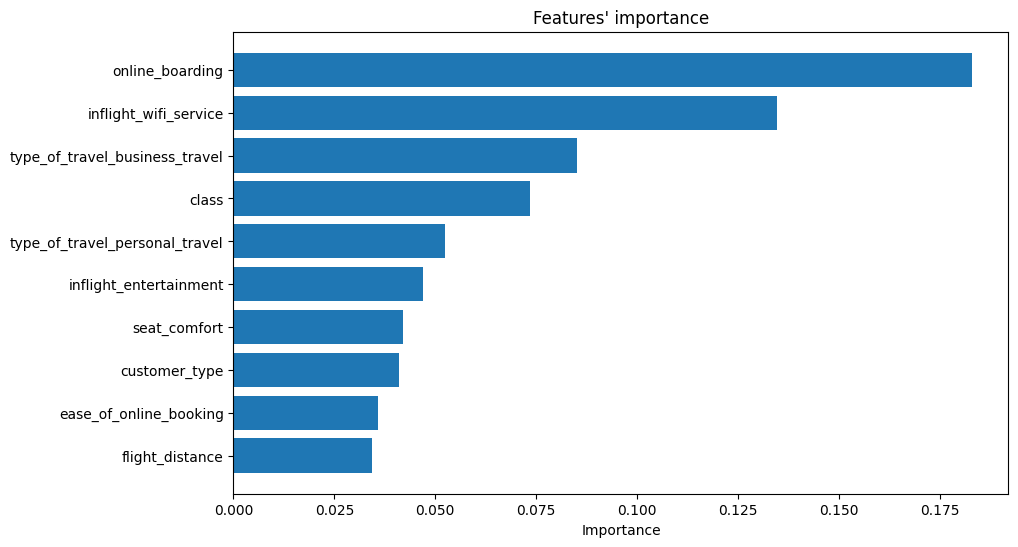

In [47]:
importances = pd.DataFrame({'feature': X_train_subset.columns.tolist(), 'importance': rf_classifier.feature_importances_})

# Ordenar por importância
importances = importances[importances.importance>=0.032].sort_values('importance', ascending=True)

# Plotar a importância das features
plt.figure(figsize=(10,6))
plt.barh(importances['feature'], importances['importance'])
plt.xlabel("Importance")
plt.title("Features' importance")
plt.show()

filtered_features = importances.feature.tolist()

In [55]:
# Define search space for hyperparameters
n_estimators_range = [450, 500, 550]
max_depth_range = [13, 15, 17, 19]

# Initialize dictionary to store metrics
rf_metrics_dict = {}

# Perform grid search
print('Tested hyperparameters:')
for n in n_estimators_range:
    for d in max_depth_range:
        # Initialize RandomForestClassifier
        rf_classifier = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=0)
        rf_classifier.fit(X_train_subset[filtered_features], y_train.values.ravel())

        # Predict on validation set
        yhat_val = rf_classifier.predict(X_val_subset[filtered_features])

        # Metrics calculation        
        accuracy = accuracy_score(y_val, yhat_val)
        precision = precision_score(y_val, yhat_val, average='weighted')
        recall = recall_score(y_val, yhat_val, average='weighted')
        f1 = f1_score(y_val, yhat_val, average='weighted')

        # Store metrics in dictionary
        rf_metrics_dict[(n, d)] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
        print(f'n_estimators={n}, max_depth={d}')

# Extract unique hyperparameter values and sort them
n_estimators_unique = np.unique([key[0] for key in rf_metrics_dict.keys()])
max_depth_unique = np.unique([key[1] for key in rf_metrics_dict.keys()])

# Create a grid for the surface plot
n_estimators_grid, max_depth_grid = np.meshgrid(n_estimators_unique, max_depth_unique)

# Initialize arrays for the metrics
accuracy_grid = np.zeros_like(n_estimators_grid, dtype=float)
precision_grid = np.zeros_like(n_estimators_grid, dtype=float)
recall_grid = np.zeros_like(n_estimators_grid, dtype=float)
f1_grid = np.zeros_like(n_estimators_grid, dtype=float)

# Fill the grids with metric values
for (n, d), metrics in rf_metrics_dict.items():
    i = np.where(n_estimators_unique == n)[0][0]
    j = np.where(max_depth_unique == d)[0][0]
    accuracy_grid[j, i] = metrics['accuracy']
    precision_grid[j, i] = metrics['precision']
    recall_grid[j, i] = metrics['recall']
    f1_grid[j, i] = metrics['f1']

# Create the figure
fig = go.Figure()

# Add accuracy surface
fig.add_trace(go.Surface(
    x=n_estimators_grid,
    y=max_depth_grid,
    z=accuracy_grid,
    colorscale='plotly3',
    colorbar=dict(title='Accuracy'),
    name='Accuracy'
))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='n_estimators',
        yaxis_title='max_depth',
        zaxis_title='Score',
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.5))  # Adjust the camera for better view
    ),
    title="Random Forest Hyperparameter Tuning - Surface Plot",
    autosize=True,
    height=800
)

fig.show()

# Find the best parameters based on accuracy
rf_best_params_val = max(rf_metrics_dict, key=lambda k: rf_metrics_dict[k]['accuracy'])
rf_metrics_best_val = rf_metrics_dict[rf_best_params_val]

print(f"Best parameters: n_estimators={rf_best_params_val[0]}, max_depth={rf_best_params_val[1]}")
rf_metrics_best_val

Tested hyperparameters:
n_estimators=450, max_depth=13
n_estimators=450, max_depth=15
n_estimators=450, max_depth=17
n_estimators=450, max_depth=19
n_estimators=500, max_depth=13
n_estimators=500, max_depth=15
n_estimators=500, max_depth=17
n_estimators=500, max_depth=19
n_estimators=550, max_depth=13
n_estimators=550, max_depth=15
n_estimators=550, max_depth=17
n_estimators=550, max_depth=19


Best parameters: n_estimators=500, max_depth=17


{'accuracy': 0.9445606357990927,
 'precision': np.float64(0.9447036891455044),
 'recall': np.float64(0.9445606357990927),
 'f1': np.float64(0.9444444432151429)}

### 3.3.3 - Test

In [56]:
# Model trained on training + validation

model_last = RandomForestClassifier(
    max_depth=int(rf_best_params_val[1]), 
    n_estimators=int(rf_best_params_val[0]), 
    random_state=0
)
model_last.fit(X_train_val, y_train_val)

#classification on training + validation data
yhat_test = model_last.predict(X_test_subset)

# Metrics calculation
report = classification_report(y_test, yhat_test, output_dict=True)
rf_metrics_test = {
    'accuracy' : report['accuracy'],
    'precision': report['weighted avg']['precision'],
    'recall'   : report['weighted avg']['recall'],
    'f1'       : report['weighted avg']['f1-score']
}

rf_metrics_test

{'accuracy': 0.9622677943845827,
 'precision': 0.9624005157219067,
 'recall': 0.9622677943845827,
 'f1': 0.9622102026307832}

### 3.3.4 - Results

In [57]:
rf_metrics = pd.DataFrame({
    'Train': rf_metrics_train,
    'Validation': rf_metrics_best_val,
    'Test':rf_metrics_test
})
rf_metrics = rf_metrics.T
rf_metrics

,accuracy,precision,recall,f1
Train,1.000000,1.000000,1.000000,1.000000
Validation,0.944561,0.944704,0.944561,0.944444
Test,0.962268,0.962401,0.962268,0.962210


## 3.4 - Logistic Regression


### 3.4.1 - Training

In [61]:
# Definition
model_log_reg = LogisticRegression(random_state=0)

# Training
model_log_reg.fit(X_train_subset, y_train.values.ravel())

# Classification over training data
yhat_train = model_log_reg.predict(X_train_subset)

# Metrics calculation
acc_train = accuracy_score(y_train, yhat_train)
prec_train = precision_score(y_train, yhat_train, average='weighted')
rec_train = recall_score(y_train, yhat_train, average='weighted')
f1_train = f1_score(y_train, yhat_train, average='weighted')

# Storing metrics in the dictionary
log_reg_metrics_train = {
    'accuracy': acc_train,
    'precision': prec_train,
    'recall': rec_train,
    'f1': f1_train
}

log_reg_metrics_train

{'accuracy': 0.8752671860994277,
 'precision': np.float64(0.8751339162478147),
 'recall': np.float64(0.8752671860994277),
 'f1': np.float64(0.8749394950802856)}

### 3.4.2 - Validation

In [58]:
clf_log_reg = LogisticRegression()
cv = StratifiedKFold(
    n_splits=3,
    random_state=0,
    shuffle=True
)
# hyperparameter search space
param_grid_knn = {
    'C': np.logspace(1,3,3),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [10, 50, 100],
}

# grid search
grid_log_reg = GridSearchCV(
    estimator=clf_log_reg,
    param_grid=param_grid_knn,
    cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    verbose=2,
    refit='accuracy',
    # n_jobs=-1
)

# train
grid_log_reg.fit(X_train_subset, y_train.values.ravel())

# Extract best parameters and their corresponding metrics
best_index = grid_log_reg.best_index_

# Create a dictionary with the metrics
log_reg_metrics_best_val = {
    'accuracy': float(grid_log_reg.cv_results_['mean_test_accuracy'][best_index]),
    'precision': float(grid_log_reg.cv_results_['mean_test_precision'][best_index]),
    'recall': float(grid_log_reg.cv_results_['mean_test_recall'][best_index]),
    'f1': float(grid_log_reg.cv_results_['mean_test_f1'][best_index])
}

log_reg_metrics_best_val

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END ..................C=10.0, max_iter=10, solver=lbfgs; total time=   3.2s
[CV] END ..................C=10.0, max_iter=10, solver=lbfgs; total time=   0.1s
[CV] END ..................C=10.0, max_iter=10, solver=lbfgs; total time=   0.1s
[CV] END ..............C=10.0, max_iter=10, solver=liblinear; total time=   0.7s
[CV] END ..............C=10.0, max_iter=10, solver=liblinear; total time=   0.8s
[CV] END ..............C=10.0, max_iter=10, solver=liblinear; total time=   0.8s
[CV] END ..............C=10.0, max_iter=10, solver=newton-cg; total time=   0.3s
[CV] END ..............C=10.0, max_iter=10, solver=newton-cg; total time=   0.3s
[CV] END ..............C=10.0, max_iter=10, solver=newton-cg; total time=   0.3s
[CV] END ........C=10.0, max_iter=10, solver=newton-cholesky; total time=   0.2s
[CV] END ........C=10.0, max_iter=10, solver=newton-cholesky; total time=   0.1s
[CV] END ........C=10.0, max_iter=10, solver=ne

{'accuracy': 0.8752119989970061,
 'precision': 0.8708780188180936,
 'recall': 0.8360379279623266,
 'f1': 0.8530936393792627}

In [29]:
result_grid_df = pd.DataFrame(grid_log_reg.cv_results_)
best_estimator = result_grid_df.loc[result_grid_df.rank_test_accuracy == 1]

lr_acc_val  = float(best_estimator['mean_test_accuracy'])
lr_prec_val = float(best_estimator['mean_test_precision'])
lr_rec_val  = float(best_estimator['mean_test_recall'])
lr_f1_val   = float(best_estimator['mean_test_f1'])

print(f'Accuracy Over Validation:  {lr_acc_val:.5f}')
print(f'Precision Over Validation: {lr_prec_val:.5f}')
print(f'Recall Over Validation:    {lr_rec_val:.5f}')
print(f'F1 Score Over Validation:  {lr_f1_val:.5f}')

Accuracy Over Validation:  0.87525
Precision Over Validation: 0.87117
Recall Over Validation:    0.83578
F1 Score Over Validation:  0.85310


### 3.3.3 - Test

In [59]:
# Model trained on training + validation

best_params = grid_log_reg.best_params_

model_last = LogisticRegression(
    C=best_params['C'],
    solver=best_params['solver'],
    max_iter=best_params['max_iter'],
    random_state=0
)
model_last.fit(X_train_val, y_train_val)

#classification on training + validation data
yhat_test = model_last.predict(X_test_subset)

# Metrics calculation
report = classification_report(y_test, yhat_test, output_dict=True)
log_reg_metrics_test = {
    'accuracy' : report['accuracy'],
    'precision': report['weighted avg']['precision'],
    'recall'   : report['weighted avg']['recall'],
    'f1'       : report['weighted avg']['f1-score']
}

log_reg_metrics_test

{'accuracy': 0.8713551925230757,
 'precision': 0.8712608536230031,
 'recall': 0.8713551925230757,
 'f1': 0.871031431206781}

### 3.3.4 - Results

In [62]:
log_reg_metrics = pd.DataFrame({
    'Train': log_reg_metrics_train,
    'Validation': log_reg_metrics_best_val,
    'Test':log_reg_metrics_test
})
log_reg_metrics = log_reg_metrics.T
log_reg_metrics

,accuracy,precision,recall,f1
Train,0.875267,0.875134,0.875267,0.874939
Validation,0.875212,0.870878,0.836038,0.853094
Test,0.871355,0.871261,0.871355,0.871031


## 3.5 - Trial results


#### On the Training data 

In [64]:
train_metrics_df = pd.DataFrame({
    'KNN': knn_metrics_best_train,
    'Decision Tree': dt_metrics_train,
    'Random Forest': rf_metrics_train,
    'Logistic Regression': log_reg_metrics_train
}).T

train_metrics_df.style.background_gradient(cmap='coolwarm')

,accuracy,precision,recall,f1
KNN,0.957016,0.957590,0.957016,0.956874
Decision Tree,1.000000,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000,1.000000
Logistic Regression,0.875267,0.875134,0.875267,0.874939


#### On the Validation data

In [65]:
validation_metrics_df = pd.DataFrame({
    'KNN': knn_metrics_best_val,
    'Decision Tree': dt_metrics_best_val,
    'Random Forest': rf_metrics_best_val,
    'Logistic Regression': log_reg_metrics_best_val
}).T

validation_metrics_df.style.background_gradient(cmap='coolwarm')

,accuracy,precision,recall,f1
KNN,0.927911,0.929632,0.927911,0.927441
Decision Tree,0.950738,0.950866,0.950738,0.950645
Random Forest,0.944561,0.944704,0.944561,0.944444
Logistic Regression,0.875212,0.870878,0.836038,0.853094


#### On the Test data

In [66]:
test_metrics_df = pd.DataFrame({
    'KNN': knn_metrics_test,
    'Decision Tree': dt_metrics_test,
    'Random Forest': rf_metrics_test,
    'Logistic Regression': log_reg_metrics_test
}).T

test_metrics_df.style.background_gradient(cmap='coolwarm')

,accuracy,precision,recall,f1
KNN,0.955355,0.955459,0.955355,0.955288
Decision Tree,0.955355,0.955459,0.955355,0.955288
Random Forest,0.962268,0.962401,0.962268,0.962210
Logistic Regression,0.871355,0.871261,0.871355,0.871031


Despite offering good results, **KNN** is very time-consuming to classify, as it needs to calculate the distance between the test point and all the training points for each prediction, which can be a problem with large data sets. 

In contrast, **decision trees** are generally much quicker to obtain results, as they make decisions based on simple binary rules. 

**Logistic Regression**, on the other hand, yielded less satisfactory results, possibly due to its assumption of linearity, which may not capture the complexity of the data well in non-linear problems. 

As expected, ensemble algorithms, such as **Random Forest**, tend to provide good results due to their nature of combining several decision trees. This combination improves the accuracy and robustness of the model by reducing the risk of overfitting and better capturing the complexity of the data.